# Ridge Regression Lasso Regression Elastic net

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston=load_boston()

In [6]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
#creating data set
import pandas as pd
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
boston_df['TARGET']=boston.target

In [15]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
x=boston_df.drop('TARGET',axis=1)

In [17]:
x.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [18]:
y=boston_df['TARGET']

In [19]:
y.values

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [22]:
#Ridge Regression=sum of errors+sum of sqres of magnitude of coffient(alpha)
from sklearn.linear_model import Ridge
rr=Ridge(alpha=1,solver='svd')

In [23]:
rr

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='svd', tol=0.001)

In [24]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [30]:
rr.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='svd', tol=0.001)

In [33]:
y_predict=rr.predict(x_train)

In [34]:
y_predict

array([25.29223718, 22.42092495,  8.35280972, 20.6211219 , 15.10772968,
       31.76475656, 24.60464683, 25.32487707, 39.09485045, 28.74595643,
       14.67588406, 35.01424584, 36.45335556, 32.91640701, 21.72240767,
       17.16212337, 34.75795814, 39.86327543, 21.43576371, 15.81925998,
       27.76006701, 19.77077205, 27.05159799, 21.61273363, 25.28326518,
       22.68620691, 22.99949356, 28.30655129, 20.32556775, 24.22892721,
       28.95179412, 10.53378434, 26.78220329, 32.97228473, 15.22612352,
       13.72413035, 33.57456768, 13.85225313, 18.53031542, 16.27273846,
       17.05264042, 28.50407607, 33.86367965, 20.40236694, 24.84460702,
       16.48032015, 28.2100639 , 19.9752808 , 34.880547  , 13.96080602,
       20.16758902, 18.73526363, 19.62480557, 32.08509963, 16.6483862 ,
       28.31191239, 22.47172504, 28.94933728, 34.03947869, 35.84441934,
       24.18163154, 18.70464149, 18.74168906, 21.0778946 , 26.37424554,
       15.43774897, 15.36377506, 26.17147554, 22.81524605, 17.61

In [35]:
rr.score(x_train,y_train)

0.7264412428697166

In [36]:
rr.score(x_test,y_test)

0.7655800611077143

In [37]:
rr.coef_

array([-1.07392481e-01,  5.86542587e-02, -2.03610017e-02,  1.93764815e+00,
       -1.08242457e+01,  3.16397769e+00, -2.71608858e-03, -1.37083408e+00,
        2.85799035e-01, -1.19648594e-02, -8.90556121e-01,  7.77377947e-03,
       -5.55527072e-01])

In [38]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()

In [41]:
lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
lin.score(x_train,y_train)

0.7293585058196337

In [44]:
lin.score(x_test,y_test)

0.7634174432138457

In [45]:
lin.coef_

array([-1.12386867e-01,  5.80587074e-02,  1.83593559e-02,  2.12997760e+00,
       -1.95811012e+01,  3.09546166e+00,  4.45265228e-03, -1.50047624e+00,
        3.05358969e-01, -1.11230879e-02, -9.89007562e-01,  7.32130017e-03,
       -5.44644997e-01])

In [46]:
import matplotlib.pyplot as plt

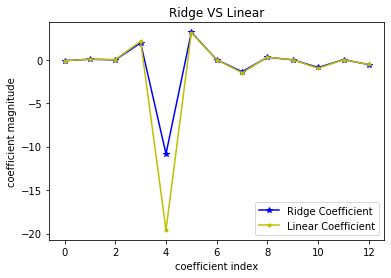

In [49]:
plt.plot(rr.coef_,marker="*",label="Ridge Coefficient",color='blue')
plt.plot(lin.coef_,marker=".",label='Linear Coefficient',color='y')
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.title('Ridge VS Linear')
plt.legend()
plt.show()

In [50]:
rr1=Ridge(alpha=100,solver='auto')

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [55]:
rr1.fit(x_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
rr1.score(x_train,y_train)

0.7115577224114283

In [58]:
rr1.score(x_test,y_test)

0.6993941071226714

In [59]:
rr1.coef_

array([-0.08631973,  0.03910627, -0.0699346 ,  0.60710917, -0.15802257,
        1.94612205,  0.02489813, -0.98474107,  0.33122195, -0.01434089,
       -0.94274371,  0.01233268, -0.76031959])

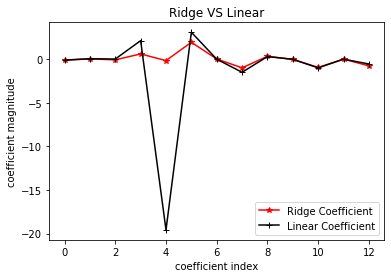

In [61]:
plt.plot(rr1.coef_,marker="*",label="Ridge Coefficient",color='red')
plt.plot(lin.coef_,marker="+",label='Linear Coefficient',color='black')
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.title('Ridge VS Linear')
plt.legend()
plt.show()

# Lasso Regression

##### lasso regression=sum of error+sum of absolute values of coefficient

In [62]:
from sklearn.linear_model import Lasso

In [66]:
lr=Lasso(alpha=1)

In [67]:
import numpy as np
new_x=np.random.rand(100,1)
new_y=0.5*new_x**2+new_x+2+np.random.rand(100,1)
print(new_x.shape)
print(new_y.shape)

(100, 1)
(100, 1)


In [68]:
lr.fit(new_x,new_y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [70]:
print('new_x',new_x)
print('new_y',new_y)

new_x [[0.16016348]
 [0.77152415]
 [0.53647041]
 [0.65533836]
 [0.03208702]
 [0.19777991]
 [0.90534462]
 [0.13447298]
 [0.08121513]
 [0.47015742]
 [0.36553553]
 [0.07800972]
 [0.2652466 ]
 [0.6689307 ]
 [0.62803281]
 [0.80159479]
 [0.82900715]
 [0.10808616]
 [0.17444881]
 [0.99994092]
 [0.36021718]
 [0.54525822]
 [0.4924042 ]
 [0.47216644]
 [0.71852627]
 [0.74043458]
 [0.52574575]
 [0.65899304]
 [0.4217672 ]
 [0.76757547]
 [0.21149638]
 [0.64660115]
 [0.13961141]
 [0.85434099]
 [0.8871525 ]
 [0.13526871]
 [0.57777905]
 [0.3550122 ]
 [0.04307524]
 [0.61648401]
 [0.1411784 ]
 [0.43634289]
 [0.20663263]
 [0.27919136]
 [0.6130612 ]
 [0.02632949]
 [0.16961548]
 [0.13516272]
 [0.41133405]
 [0.38226596]
 [0.67239567]
 [0.6247597 ]
 [0.37715572]
 [0.77796141]
 [0.99787667]
 [0.58358554]
 [0.33563925]
 [0.43060151]
 [0.69818328]
 [0.30300646]
 [0.55014659]
 [0.02890208]
 [0.70085855]
 [0.96571501]
 [0.87087673]
 [0.64103047]
 [0.67903435]
 [0.17579661]
 [0.30871693]
 [0.68592541]
 [0.1901366 ]


In [69]:
new_x[1]

array([0.77152415])

In [73]:
lr.predict([[0.16]])

array([3.18061356])

In [74]:
lr.predict([[0.10]])

array([3.18061356])

In [78]:
new_x_train,new_x_test,new_y_train,new_y_test=train_test_split(new_x,new_y,test_size=0.3,
                                                               random_state=2)

In [79]:
lr.fit(new_x_train,new_y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [80]:
lr.score(new_x_train,new_y_train)

0.0

In [81]:
lr.score(new_x_test,new_y_test)

-0.015837532655537334

In [82]:
lr.coef_

array([0.])

In [84]:
#lasso regression for boston
lb=Lasso(alpha=1)

In [85]:
lb.fit(x_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [86]:
lb.score(x_train,y_train)

0.6809855358114094

In [87]:
lb.score(x_test,y_test)

0.6741127053025071

In [88]:
lb.coef_

array([-0.04939239,  0.03079107, -0.        ,  0.        , -0.        ,
        0.97857535,  0.04023522, -0.53179719,  0.27002508, -0.01345466,
       -0.82230818,  0.0110201 , -0.84047973])

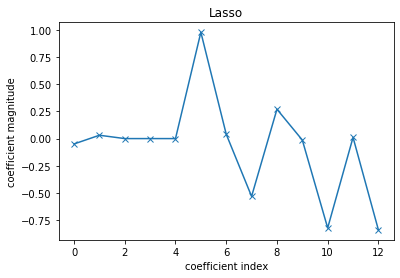

In [91]:
plt.plot(lb.coef_,marker='x',label="Lasso Regression")
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.title('Lasso')
plt.show()

In [92]:
#Elastic regression:redge +lasso regression(ratio=1[lasso],ratio=0[ridge])
from sklearn.linear_model import ElasticNet

In [93]:
e=ElasticNet()

In [94]:
p=6*np.random.rand(50,2)
q=8*p**2+p+2+np.random.rand(50,2)
print(p.shape)
print(q.shape)

(50, 2)
(50, 2)


In [100]:
e=ElasticNet(alpha=0.1,l1_ratio=1)

In [101]:
e.fit(p,q)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
e.coef_

array([[46.44261685, -0.32497452],
       [ 2.1340754 , 50.22649026]])

In [103]:
p[1]

array([1.75560562, 0.33970866])

In [104]:
q[1]

array([29.13684036,  4.1667537 ])

In [105]:
e.predict([[0.98254076,2.54782463]])

array([[10.04120385, 77.18112584]])